# Метод главных компонент

Метод Главных Компонент (англ. Principal Components Analysis, PCA) — один из основных способов уменьшить размерность данных, потеряв наименьшее количество информации. Изобретен К. Пирсоном (англ.Karl Pearson) в 1901 г. Применяется во многих областях, таких как распознавание образов, компьютерное зрение, сжатие данных и т. п. Вычисление главных компонент сводится к вычислению собственных векторов и собственных значений ковариационной матрицы исходных данных или к сингулярному разложению матрицы данных. Иногда метод главных компонент называют преобразованием Кархунена-Лоэва (англ. Karhunen-Loeve)[1] или преобразованием Хотеллинга (англ. Hotelling transform). Другие способы уменьшения размерности данных — это метод независимых компонент, многомерное шкалирование, а также многочисленные нелинейные обобщения: метод главных кривых и многообразий, поиск наилучшей проекции (англ. Projection Pursuit), нейросетевые методы «узкого горла», самоорганизующиеся карты Кохонена и др.\

Задача анализа главных компонент, имеет, как минимум, четыре базовых версии:

* аппроксимировать данные линейными многообразиями меньшей размерности;
* найти подпространства меньшей размерности, в ортогональной проекции на которые разброс данных (т.е. среднеквадратичное уклонение от среднего значения) максимален;
* найти подпространства меньшей размерности, в ортогональной проекции на которые среднеквадратичное расстояние между точками максимально;
* для данной многомерной случайной величины построить такое ортогональное преобразование координат, что в результате корреляции между отдельными координатами обратятся в ноль.

Существует несколько эквивалентных математических формулировок метода главных компонент. Основная идея заключается в нахождении таких попарно ортогональных направлений в исходном многомерном пространстве, вдоль которых данные имеют наибольший разброс (выборочную дисперсию). Эти направления называются главными компонентами. 

Другая формулировка PCA - для данной многомерной случайной величины построить такое ортогональное преобразование координат, что в результате корреляции между отдельными координатами обратятся в ноль. Таким образом, задача сводится к диагонализации матрицы ковариаций, что эквивалентно нахождению сингулярного разложения матрицы исходных данных. Хотя формально задачи сингулярного разложения матрицы данных и спектрального разложения ковариационной матрицы совпадают, алгоритмы вычисления сингулярного разложения напрямую, без вычисления ковариационной матрицы и её спектра, более эффективны и устойчивы.

Ещё одной из формулировок задачи PCA является нахождение такой $d$-мерной плоскости в признаковом пространстве, что ошибка проецирования обучающих объектов на нее будет минимальной. Направляющие векторы этой плоскости и будут первыми $d$ главными компонентами.



Задача состоит в сжатии выборки: нужно перевести точки из N-мерного пространства в M-мерное пространство, где M < N, причем так, чтобы близкие точки остались близкими. То есть хочется значительно уменьшить число признаков, не сильно потеряв (или даже улучшив) их качество.

### Алгоритм PCA
1. Определить $k<n$ - новую размерность
2. Вычесть из $X$ среднее, то есть заменить все $\Large x^{(i)}$  на $$\Large  x^{(i)} - \frac{1}{m} \sum_{i=1}^{m}{x^{(i)}}$$
3. Привести данные к единичной дисперсии: посчитать $$\Large  \sigma_j^2 = \frac{1}{m} \sum_{i=1}^{m}{(x^{(i)})^2}$$
и заменить $\Large x_j^{(i)}$ на $\Large \frac{x_j^{(i)}}{\sigma_j}$ 
4. Найти сингулярное разложение матрицы $X$:
$$\Large X = UDV^T$$
5. Положить $V =$ [$k$ левых столбцов матрицы $V$]
6. Вернуть новую матрицу $$\Large Z = XV \in \mathbb{R}^{m \times k}$$

Метод PCA заключается в том, чтобы найти в N-мерном пространстве такое K-мерное пространство, что проекция всех точек на него будет как можно более рассеянной (то есть иметь наибольшую дисперсию).
а:

### Двухмерный пример

Чтобы понять геометрический смысл главных компонент, рассмотрим в качестве примера выборку из двухмерного нормального распределения с явно выраженным "главным" направлением. Выделим в ней главные компоненты и посмотрим, какую долю дисперсии объясняет каждая из них.

In [1]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

Populating the interactive namespace from numpy and matplotlib


Proportion of variance explained by each component:
1st component - 0.94,
2nd component - 0.06

Directions of principal components:
1st component: [-0.57532172  0.81792721] 
2nd component: [-0.81792721 -0.57532172]


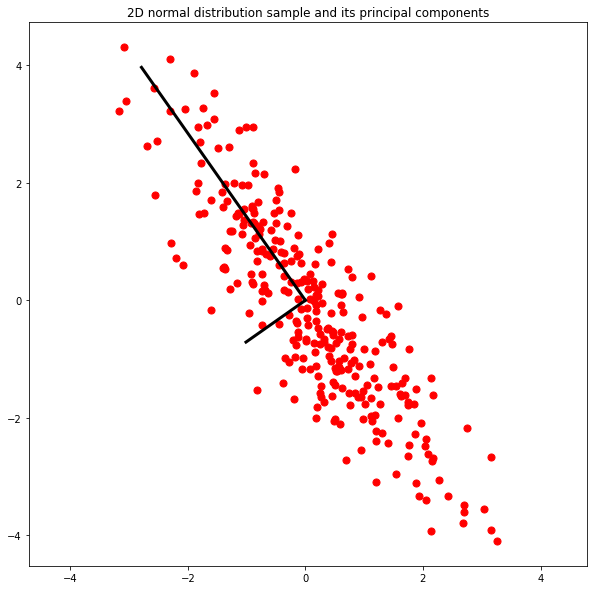

In [2]:
np.random.seed(0)
mean = np.array([0.0, 0.0])
cov = np.array([[1.0, -1.0], 
                [-2.0, 3.0]])
X = np.random.multivariate_normal(mean, cov, 300)

pca = PCA()
pca.fit(X)
print('Proportion of variance explained by each component:\n' +\
      '1st component - %.2f,\n2nd component - %.2f\n' %
      tuple(pca.explained_variance_ratio_))
print('Directions of principal components:\n' +\
      '1st component:', pca.components_[0],
      '\n2nd component:', pca.components_[1])

plt.figure(figsize=(10,10))
plt.scatter(X[:, 0], X[:, 1], s=50, c='r')
for l, v in zip(pca.explained_variance_ratio_, pca.components_):
    d = 5 * np.sqrt(l) * v
    plt.plot([0, d[0]], [0, d[1]], '-k', lw=3)
plt.axis('equal')
plt.title('2D normal distribution sample and its principal components')
plt.show()

Первая главная компонента (ей соответствует более длинный вектор) объясняет более 90% дисперсии исходных данных. Это говорит о том, что она содержит в себе почти всю информацию о расположении выборки в пространстве, и вторая компонента может быть опущена. Спроецируем данные на нёё.

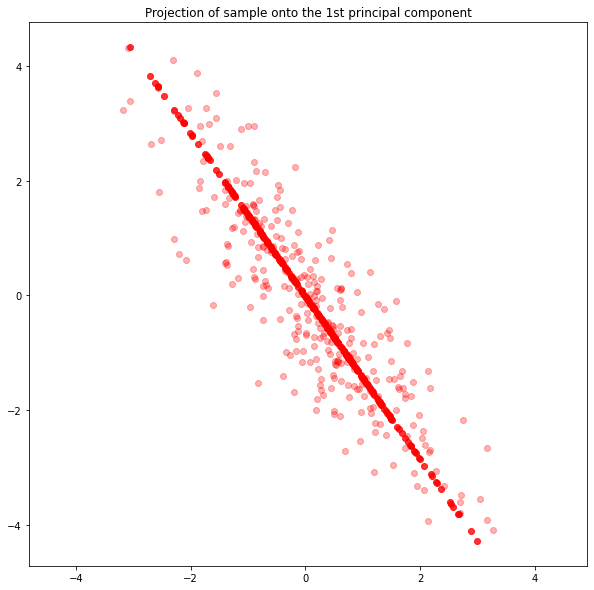

In [3]:
# Keep enough components to explain 90% of variance
pca = PCA(0.90)
X_reduced = pca.fit_transform(X)

# Map the reduced data into the initial feature space
X_new = pca.inverse_transform(X_reduced)

plt.figure(figsize=(10,10))
plt.plot(X[:, 0], X[:, 1], 'or', alpha=0.3)
plt.plot(X_new[:, 0], X_new[:, 1], 'or', alpha=0.8)
plt.axis('equal')
plt.title('Projection of sample onto the 1st principal component')
plt.show()

Мы понизили размерность данных вдвое, при этом сохранив наиболее значимые черты. В этом заключается основной принцип понижения размерности - приблизить многомерный набор данных с помощью данных меньшей размерности, сохранив при этом как можно больше информации об исходных данных.

### Визуализация многомерных данных

Одним из применений метода главных компонент является визуализации многомерных данных в двухмерном (или трехмерном) пространстве. Для этого необходимо взять первые две главных компоненты и спроецировать данные на них. При этом, если признаки имеют различную природу, их следует отнормировать. Основные способы нормировки:
- На единичную дисперсию по осям (масштабы по осям равны средним квадратичным отклонениям — после этого преобразования ковариационная матрица совпадает с матрицей коэффициентов корреляции).
- На равную точность измерения (масштаб по оси пропорционален точности измерения данной величины).
- На равные требования в задаче (масштаб по оси определяется требуемой точностью прогноза данной величины или допустимым её искажением — уровнем толерантности). 

#### Пример с набором данных Iris

Meaning of the 2 components:
0.361 x sepal length (cm) + -0.085 x sepal width (cm) + 0.857 x petal length (cm) + 0.358 x petal width (cm)
0.657 x sepal length (cm) + 0.730 x sepal width (cm) + -0.173 x petal length (cm) + -0.075 x petal width (cm)


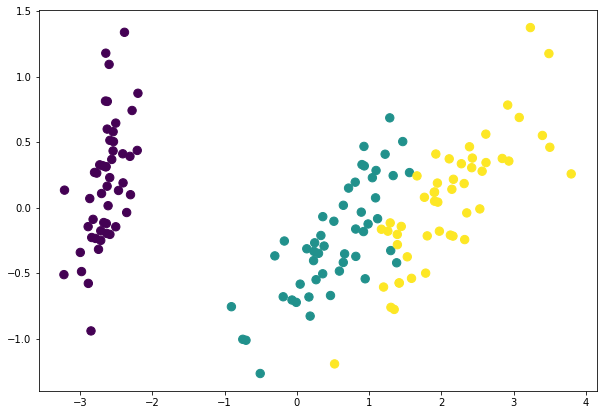

In [4]:
from sklearn import datasets

iris = datasets.load_iris()
X, y = iris.data, iris.target

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

print("Meaning of the 2 components:")
for component in pca.components_:
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,
                                            iris.feature_names)))
plt.figure(figsize=(10,7))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, s=70, cmap='viridis')
plt.show()

### Пример с набором данных digits

Рассмотрим применение метода главных компонент для визуализации данных из набора изображений рукописных цифр.

Projecting 64-dimensional data to 2D


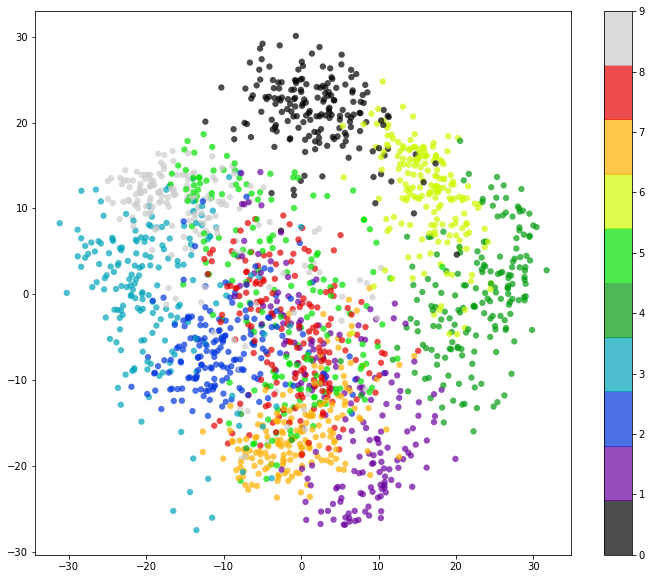

In [5]:
from sklearn.datasets import load_digits

digits = load_digits()
X = digits.data
y = digits.target

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

print('Projecting %d-dimensional data to 2D' % X.shape[1])

plt.figure(figsize=(12,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.show()

Полученная картинка позволяет увидеть зависимости между различными цифрами. Например, цифры 0 и 6 располагаются в соседних кластерах, что говорит об их схожем написании. Наиболее "разбросанный" (по другим кластерам) - это кластер, соответствующий цифре 8, что говорит о том, что она имеет много различных написаний, делающих её схожей со многими другими цифрами.

Посмотрим, как выглядят первые две главные компоненты.

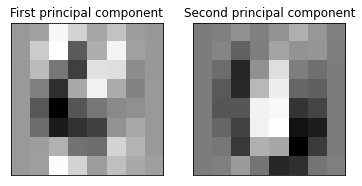

In [6]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

im = pca.components_[0]
ax1.imshow(im.reshape((8, 8)), cmap='binary')
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('First principal component')

im = pca.components_[1]
ax2.imshow(im.reshape((8, 8)), cmap='binary')
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title('Second principal component')
plt.show()

В каком-то смысле PCA - это лучший линейный способ уменьшить размерность пространства.

**Плюсы PCA:**
* считается относительно быстро
* детерминированность
* любая размерность
* полученную модель уменьшения размерности можно применять и к новым точкам (нужно просто спроецировать ее на выделенное K-мерное пространство)
* визуализация при K = 2 - это честная проекция на какую-то плоскость, легкая интерпретируемость результатов
* при увеличении размерности старые координаты не меняются
* отлично подходит для отбора признаков

**Минусы PCA:**
* алгоритм слишком простой - он линейный
* некоторы непохожие точки могут спроецироваться в одну и ту же при K = 2

Мы видим, что классы одинаковых цифр не до конца отделились друг от друга, и в 2-мерном пространстве эту проблему можно решить только если использовать какой-нибудь нелинейный алгоритм.

## t-SNE

<a href='https://distill.pub/2016/misread-tsne/'>Визуализация</a> метода уменьшения размерности t-SNE.

Это гораздо более сложный нелинейный <a href='https://habr.com/post/267041/'> алгоритм</a>. Он очень крут для визуализации данных, и работает только с переводом в 2D и 3D.

Внутри там происходит что-то физическое - элементы будто разлетаются, причем чем дальше они друг от друга, тем сильнее они друг друга оттакливают.

**Плюсы t-SNE**
* отлично визуализирует (2D, 3D) данные
* физически разносит разные точки дальше друг от друга
* сильно разные точки не могут в конце оказаться рядом

**Недостатки t-SNE**
* недетерминированность, результат меняется при каждом запуске
* координаты ничего не значат сами по себе
* нельзя легко добавить новые данные
* долго работает
* уменьшает только до 2 и 3 размерности

Давайте запустим на 400 итерациях (у меня работает секунд 20, если у вас долго не работает, то уменьшите число итераций):

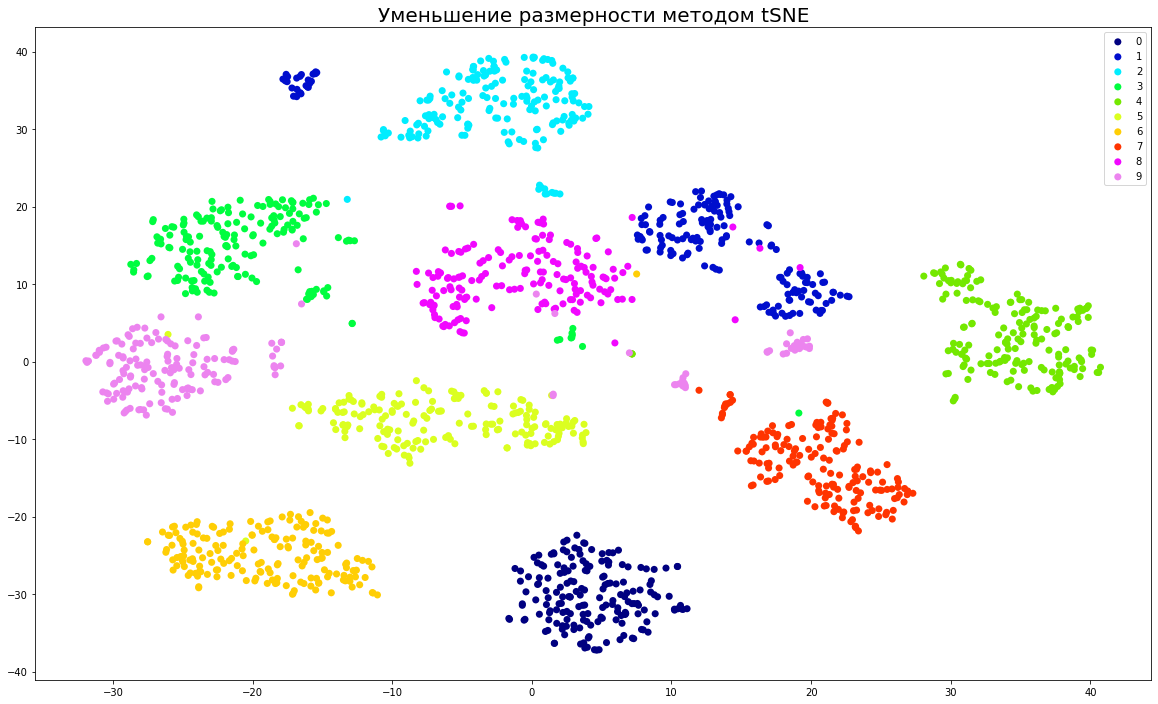

In [73]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, n_iter=400)

X_tsne_2 = tsne.fit_transform(X)
plt.figure(figsize=(20, 12))
for d in range(10):
    norm = Normalize(vmin=0, vmax=10)
    color = plt.cm.gist_ncar(norm(d))
    plt.scatter(X_tsne_2[:, 0][y == d],
                X_tsne_2[:, 1][y == d],
                c=[color] * len(X_tsne_2[:, 0][y == d]), label=d, edgecolor='none', s=50)
plt.title(u"Уменьшение размерности методом tSNE", fontsize=20)
plt.legend()

Заметьте, что мы никак не использовали метки классов! Но они отделились фантастически!

#  Применение уменьшения размерности для классификации

Несмотря на то, что мы выкинули очень много данных, кажется, что во вложении tSNE решить задачу классификации стало только проще.

А вот PCA при вложении теряет много информации, и качество должно ухудшиться (зато работают быстрее).

Давайте проверим: запустим классификацию на обычном датасете и на сжатых с помощью PCA и tSNE.

In [81]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
# Применим PCA к нашим векторам с цифрами
X_pca_2 = pca.fit(X).transform(X)
X_pca_2

array([[ -1.25946663,  21.27488332],
       [  7.95761106, -20.76869773],
       [  6.99192323,  -9.95598673],
       ...,
       [ 10.80128387,  -6.96025388],
       [ -4.87210054,  12.42395412],
       [ -0.34438923,   6.36554634]])

In [82]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression

# будем применять, например, логистическую регрессию
print('accuracy for raw data is {}'.format(cross_val_score(LogisticRegression(),
                                                           X, y,
                                                           scoring='accuracy').mean()))
print('accuracy for data transormed by SVD-2D is {}'.format(cross_val_score(LogisticRegression(),
                                                                            X_svd_2, y,
                                                                            scoring='accuracy').mean()))
print('accuracy for data transormed by PCA-2D is {}'.format(cross_val_score(LogisticRegression(),
                                                                            X_pca_2, y,
                                                                            scoring='accuracy').mean()))
print('accuracy for data transormed by tSNE-2D is {}'.format(cross_val_score(LogisticRegression(),
                                                                             X_tsne_2, y,
                                                                             scoring='accuracy').mean()))

accuracy for raw data is 0.9182204459698582
accuracy for data transormed by SVD-2D is 0.3583226957090529
accuracy for data transormed by PCA-2D is 0.553506378473749
accuracy for data transormed by tSNE-2D is 0.863706373379055


Мы видим, что сжатый с помощью tSNE датасет все-таки проигрывает в качестве классификации обычному, но несильно. Часто уменьшение размерности даже позволяет улучшить результат.

А вот PCA сильно проигрывает tSNE. Однако это потому, что мы снизили размерность аж до двух. Давайте возьмем побольше размерность признаков.

SVD проигрывает PCA еще сильнее.

Обязательное задание 9 : Переберите размерность сжатия датасета с помощью PCA и посчитайте для каждой из них качество классификации. Сколько признаков достаточно оставить, чтобы качество отличалось несильно?

In [ ]:
Интересно еще посмотреть на ошибки нашей классификации:

In [77]:
model = LogisticRegression()
X_tsne_2_train, X_tsne_2_test, y_tsne_2_train, y_tsne_2_test = train_test_split(X_tsne_2, y, random_state=42)
model.fit(X_tsne_2_train, y_tsne_2_train)
y_pred = model.predict(X_tsne_2_test)
errors = (y_pred != y_tsne_2_test)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

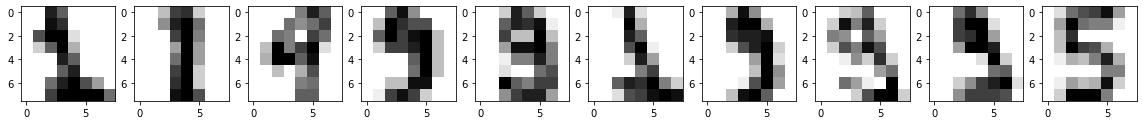

In [78]:
NUMBER_DIGITS = 10

plt.figure(figsize=(20, 12))
digits = X_test[errors][:NUMBER_DIGITS]
for i, digit in enumerate(digits):
    plt.subplot(1, len(digits), i + 1)
    plt.imshow(digit.reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')

In [79]:
# Предсказали:
y_pred[errors][:len(digits)]

array([2, 2, 1, 3, 3, 2, 3, 3, 3, 9])

In [80]:
# А на самом деле:
y_test[errors][:len(digits)]

array([1, 1, 9, 9, 9, 1, 9, 9, 9, 5])

## Полезные ссылки
- [Формальное описание PCA](http://www.machinelearning.ru/wiki/index.php?title=%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%B3%D0%BB%D0%B0%D0%B2%D0%BD%D1%8B%D1%85_%D0%BA%D0%BE%D0%BC%D0%BF%D0%BE%D0%BD%D0%B5%D0%BD%D1%82)
- [PCA in 3 steps](http://sebastianraschka.com/Articles/2015_pca_in_3_steps.html)
- [SVD](https://ru.wikipedia.org/wiki/%D0%A1%D0%B8%D0%BD%D0%B3%D1%83%D0%BB%D1%8F%D1%80%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D0%B7%D0%BB%D0%BE%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5)
- [Eigenface](https://en.wikipedia.org/wiki/Eigenface)
- [sklearn.decomposition](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.decomposition)